# Supplementary information: compute coupling coefficient between $H_s$ and current speed
#### g.marechal (Toulouse, August 2025)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.path import Path
from src import *
from scipy import stats


In [2]:
pol = 'cyclonic' # polarization
path_data = '../data/'
path_output = '../figures/'


### Load data

In [3]:
ds_reg = xr.open_dataset(path_data + 'data_for_regression.nc')

### Bin averaged

In [4]:
bins_current_opposed = np.arange(-.2, 0, .01)
bins_current_aligned = np.arange(.02, .2, .01)
# bins_current_opposed = np.linspace(-.03, 0, 20)
# bins_current_aligned = np.linspace(.01, .03, 20)

# Waves aligned with current --- cyclonic
# --- Swell
bin_centered_cyc_opposed_full_swell, mean_data_binned_cyc_opposed_full_swell, std_data_binned_cyc_opposed_full_swell = bin_data(bins_current_opposed,\
                                                                       ds_reg.mean_cur_swell_opposed.values, ds_reg.mean_hs_swell_opposed.values                                                                   )
# --- Wind Sea
bin_centered_cyc_opposed_full_ws, mean_data_binned_cyc_opposed_full_ws, std_data_binned_cyc_opposed_full_ws = bin_data(bins_current_opposed,\
                                                                       ds_reg.mean_cur_windsea_opposed.values, ds_reg.mean_hs_windsea_opposed.values
                                                                      )
# Waves opposed with current --- cyclonic
# --- Swell
bin_centered_cyc_aligned_full_swell, mean_data_binned_cyc_aligned_full_swell, std_data_binned_cyc_aligned_full_swell = bin_data(bins_current_aligned,\
                                                                       ds_reg.mean_cur_swell_aligned.values,  ds_reg.mean_hs_swell_aligned.values
                                                                      )
# Waves opposed with current --- cyclonic
# --- Wind Sea
bin_centered_cyc_aligned_full_ws, mean_data_binned_cyc_aligned_full_ws, std_data_binned_cyc_aligned_full_ws = bin_data(bins_current_aligned,\
                                                                       ds_reg.mean_cur_windsea_aligned.values, ds_reg.mean_hs_windsea_aligned.values
                                                                      )

41
72
77
89
94
88
128
102
134
142
137
205
240
235
261
278
295
291
312
15
15
17
20
21
26
21
24
14
30
27
37
63
48
48
70
50
64
73
276
239
239
242
227
191
174
152
136
147
114
97
94
96
106
84
56
61
51
47
50
43
52
36
34
32
28
26
17
22
22
20
22
9


### Slopes

In [5]:
res_cyc_opposed_swell = stats.linregress(bin_centered_cyc_opposed_full_swell, mean_data_binned_cyc_opposed_full_swell)
slope_full_opposed_swell = res_cyc_opposed_swell[0]
intercept_full_opposed_swell = res_cyc_opposed_swell[1]

res_cyc_opposed_ws = stats.linregress(bin_centered_cyc_opposed_full_ws, mean_data_binned_cyc_opposed_full_ws)
slope_full_opposed_ws = res_cyc_opposed_ws[0]
intercept_full_opposed_ws = res_cyc_opposed_ws[1]

res_cyc_aligned_swell = stats.linregress(bin_centered_cyc_aligned_full_swell, mean_data_binned_cyc_aligned_full_swell)
slope_full_aligned_swell = res_cyc_aligned_swell[0]
intercept_full_aligned_swell = res_cyc_aligned_swell[1]

res_cyc_aligned_ws = stats.linregress(bin_centered_cyc_aligned_full_ws, mean_data_binned_cyc_aligned_full_ws)
slope_full_aligned_ws = res_cyc_aligned_ws[0]
intercept_full_aligned_ws = res_cyc_aligned_ws[1]


### Plot

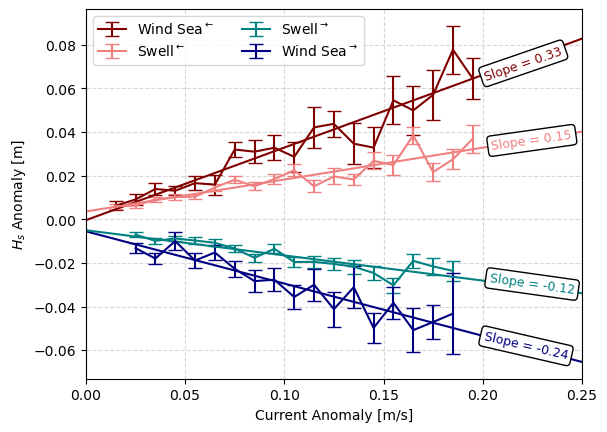

In [6]:
props = dict(boxstyle='round', facecolor='w', alpha=1)

fig, ax = plt.subplots()
ax.errorbar(bin_centered_cyc_opposed_full_ws*(-1), mean_data_binned_cyc_opposed_full_ws, yerr = std_data_binned_cyc_opposed_full_ws, capsize = 5, color = 'maroon', label = 'Wind Sea$^{\\leftarrow}$')
ax.errorbar(bin_centered_cyc_opposed_full_swell*(-1), mean_data_binned_cyc_opposed_full_swell, yerr = std_data_binned_cyc_opposed_full_swell, capsize = 5, color = 'lightcoral', label = 'Swell$^{\\leftarrow}$')
ax.errorbar(bin_centered_cyc_aligned_full_swell, mean_data_binned_cyc_aligned_full_swell, yerr = std_data_binned_cyc_aligned_full_swell, capsize = 5, color = 'teal', label = 'Swell$^{\\rightarrow}$')
ax.errorbar(bin_centered_cyc_aligned_full_ws, mean_data_binned_cyc_aligned_full_ws, yerr = std_data_binned_cyc_aligned_full_ws, capsize = 5, color = 'navy', label = 'Wind Sea$^{\\rightarrow}$')
# 
x = np.linspace(0, .25, 10)
ax.plot(x, slope_full_opposed_ws*x*(-1)+intercept_full_opposed_ws, color = 'maroon')
ax.text(0.2, 0.064, 'Slope = %.2f'%abs(slope_full_opposed_ws), color = 'maroon', rotation = 19, bbox = props, fontsize = 9)
ax.plot(x, slope_full_opposed_swell*x*(-1)+intercept_full_opposed_swell, color = 'lightcoral')
ax.text(0.204, 0.032, 'Slope = %.2f'%abs(slope_full_opposed_swell), color = 'lightcoral', rotation = 8, bbox = props, fontsize = 9)

ax.plot(x, slope_full_aligned_ws*x + intercept_full_aligned_ws, color = 'navy')
ax.text(0.2, -0.064, 'Slope = %.2f'%slope_full_aligned_ws, color = 'navy', rotation = -13, bbox = props, fontsize = 9)
ax.plot(x, slope_full_aligned_swell*x + intercept_full_aligned_swell, color = 'teal')
ax.text(0.203, -0.034, 'Slope = %.2f'%slope_full_aligned_swell, color = 'teal', rotation = -8, bbox = props, fontsize = 9)

ax.set_xlim([0, .25])
ax.set_ylabel('$H_s$ Anomaly [m]')
ax.set_xlabel('Current Anomaly [m/s]')
# plt.grid()
ax.grid(True, which='both', linestyle='--', alpha=0.5)
ax.legend(ncols = 2)

plt.savefig(path_output + 'SI_coupling_coeff.png', dpi = 300, bbox_inches = 'tight')
